In [84]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [85]:
n_task_per_file = 20
n_files = 20
base_dir = "vary_p_test_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [86]:
oper_char_df = pd.DataFrame()

for f_dir in files_list:
    oper_char_i = joblib.load(f_dir)
    oper_char_df = pd.concat([oper_char_df, pd.DataFrame(oper_char_i)])

In [87]:
oper_char_df

,Coverage Rate,Length,MSE,Method,p
0,1.000000,6.609422,31.427251,RRT,5
1,0.666667,97.292421,32.484935,Tree-Values,5
2,1.000000,11.438072,30.847000,UV(0.1),5
3,0.833333,8.212235,35.264500,RRT,10
4,0.875000,56.015805,35.180564,Tree-Values,10
...,...,...,...,...,...
109,0.500000,150.179936,26.735534,Tree-Values,5
110,1.000000,10.411149,25.429808,UV(0.1),5
111,1.000000,6.250017,26.109094,RRT,10
112,1.000000,13.866381,29.771398,Tree-Values,10


In [88]:
oper_char_df.index = range(oper_char_df.shape[0])

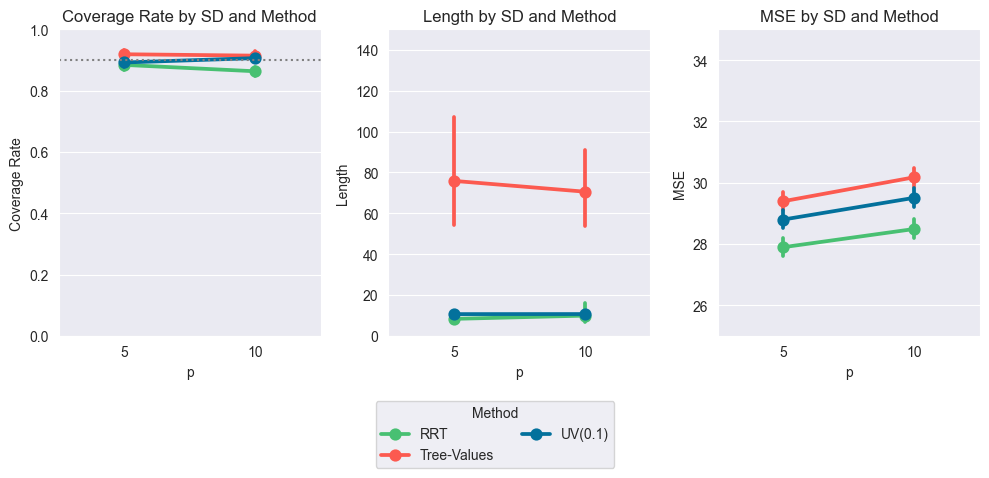

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
metrics = ["Coverage Rate", "Length", "MSE"]

# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=False)

my_palette = {"RRT": "#48c072",
              "Tree-Values": "#fc5a50",
              "UV(0.1)": "#03719c"}

# Iterate over each metric and create a box plot
for i, metric in enumerate(metrics):
    sns.pointplot(x='p', y=metric, hue='Method', data=oper_char_df, ax=axes[i],
                palette=my_palette)
    axes[i].set_title(f'{metric} by SD and Method')
    axes[i].set_xlabel('p')
    #axes[i].set_ylabel(metric if i == 0 else '')  # Only set ylabel on the first plot for clarity
    axes[i].legend(title='Method', loc='upper right')
    if metric == "Coverage Rate":
        axes[i].set_ylim(0.,1)
        axes[i].axhline(y=0.9, linestyle='dotted', color='grey')
    elif metric == "Length":
        axes[i].set_ylim(0,150)
    elif metric == "MSE":
        axes[i].set_ylim(25,35)

# Remove legends from individual subplots
for ax in axes:
    ax.legend_.remove()

# Create a shared legend for the figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Method", loc="upper center", bbox_to_anchor=(0.5, 0), ncol=2)

# Adjust layout and display
plt.tight_layout()
plt.show()



In [90]:
means = oper_char_df.groupby(['Method', "p"])[["Coverage Rate", "Length", "MSE"]].mean().reset_index()
means

,Method,p,Coverage Rate,Length,MSE
0,RRT,5,0.884328,8.281542,27.892757
1,RRT,10,0.863526,9.867511,28.487395
2,Tree-Values,5,0.919105,inf,29.393091
3,Tree-Values,10,0.914577,70.566421,30.176806
4,UV(0.1),5,0.892199,10.610814,28.795282
5,UV(0.1),10,0.906446,10.636930,29.505800


In [91]:
tree_flag = (oper_char_df['Method'] == "Tree-Values")

In [62]:
oper_char_df[tree_flag].groupby(['p'])['Length'].apply(lambda x: np.isinf(x).mean()).reset_index(name='proportion_infinity')

,p,proportion_infinity
0,5,0.002
1,10,0.002
2,20,0.002
3,50,0.000
